# Rasterio

Information on rasterio can be found at:
[https://rasterio.readthedocs.io/en/stable/index.html](https://rasterio.readthedocs.io/en/stable/index.html)

Though part of rasterio, information on affine can be found at:
[https://affine.readthedocs.io/en/latest/](https://affine.readthedocs.io/en/latest/)



# Jupyter Notebook: 09_rasterio_basics.ipynb

# ---

# # Rasterio Basics

Today we'll work with **raster data** (gridded images like satellite or elevation data) using **Rasterio**! 🛰️📈

---

## Table of Contents

1. What is Rasterio?
2. Opening Raster Files
3. Inspecting Raster Metadata
4. Reading Raster Data
5. Plotting Raster Data
6. Masking and Cropping Rasters
7. Mini-Exercises

---

# 1. What is Rasterio?

**Rasterio** makes it easy to read, write, and manipulate raster datasets.

Install it if needed:

```bash
pip install rasterio
```

Import it:

```python
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
```

---

# 2. Opening Raster Files

We'll use a sample file provided by Rasterio:

```python
import rasterio

# Example raster file
from rasterio.plot import show
from rasterio import open as rio_open

raster_path = rasterio.examples.filepath('RGB.byte.tif')

dataset = rio_open(raster_path)
```

---

# 3. Inspecting Raster Metadata

```python
# Metadata
print(dataset.meta)

# Basic info
print("Width:", dataset.width)
print("Height:", dataset.height)
print("Number of Bands:", dataset.count)
print("CRS:", dataset.crs)
print("Bounds:", dataset.bounds)
```

---

# 4. Reading Raster Data

```python
# Read the first band
band1 = dataset.read(1)

# Check shape
print(band1.shape)
```

You can read multiple bands:

```python
r, g, b = dataset.read(1), dataset.read(2), dataset.read(3)
```

Or read all bands together:

```python
all_bands = dataset.read()
print(all_bands.shape)  # (bands, rows, columns)
```

---

# 5. Plotting Raster Data

## Single Band

```python
plt.imshow(band1, cmap='gray')
plt.title('Band 1')
plt.colorbar()
plt.show()
```

## True Color Composite (RGB)

```python
# Normalize data
import numpy as np

r = r.astype('float32')
g = g.astype('float32')
b = b.astype('float32')

r /= r.max()
g /= g.max()
b /= b.max()

rgb = np.dstack((r, g, b))

plt.figure(figsize=(10,10))
plt.imshow(rgb)
plt.title('True Color RGB Composite')
plt.axis('off')
plt.show()
```

Or quickly use Rasterio's `show` function:

```python
show(dataset)
```

---

# 6. Masking and Cropping Rasters

Sometimes you want to crop your raster to a smaller area.

```python
from rasterio.mask import mask
from shapely.geometry import box
import geopandas as gpd

# Define a bounding box
bbox = box(101500, 2826000, 102500, 2827000)

# Convert to GeoJSON-like dict
gdf = gpd.GeoDataFrame({"geometry": [bbox]}, crs=dataset.crs)
geoms = [gdf.iloc[0].geometry.__geo_interface__]

# Mask the raster
dataset_crop, transform = mask(dataset=dataset, shapes=geoms, crop=True)

# Show the result
show(dataset_crop)
```

---

# 7. Mini-Exercises

### 7.1 Open the raster file and print its width, height, and number of bands

```python
# Your code here
print("Width:", dataset.width)
print("Height:", dataset.height)
print("Bands:", dataset.count)
```

### 7.2 Read and plot Band 2

```python
# Your code here
band2 = dataset.read(2)
plt.imshow(band2, cmap='gray')
plt.title('Band 2')
plt.colorbar()
plt.show()
```

### 7.3 Create a small crop of the raster and plot it

```python
# Your code here
bbox_crop = box(101900, 2826100, 102100, 2826300)

# GeoJSON format
gdf_crop = gpd.GeoDataFrame({"geometry": [bbox_crop]}, crs=dataset.crs)
geo_crop = [gdf_crop.iloc[0].geometry.__geo_interface__]

crop_data, crop_transform = mask(dataset=dataset, shapes=geo_crop, crop=True)

show(crop_data)
```

---

# Congratulations! 🎉

You've learned how to **open**, **read**, **visualize**, and **crop raster data** with **Rasterio**!

---

# Quick Recap
- Open raster files (.tif).
- Inspect raster metadata.
- Read bands individually or all at once.
- Plot rasters with Matplotlib and Rasterio.
- Mask/crop rasters using geometries.

You've now completed your crash course from **Python basics** to **full geospatial analysis**! 🌍💻🚀

In [12]:
import rasterio
from rasterio.mask import mask
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [62]:
np.set_printoptions(suppress=True)

In [21]:
# Read in WorldClim data
# For the moment just get metadata
with rasterio.open(fp="/vsizip/vsicurl/https://geodata.ucdavis.edu/climate/worldclim/2_1/base/wc2.1_5m_bio.zip/wc2.1_5m_bio_3.tif", mode="r") as src:
    # Look at the metadata
    print(src.width)
    print("-" * 50)
    print(src.height)
    print("-" * 50)
    print(src.count)
    print("-" * 50)
    print(src.crs)
    print("-" * 50)
    print(src.nodata)
    print("-" * 50)
    print(src.bounds)
    print("-" * 50)
    print(src.transform)
    print("-" * 50)
    print(src.meta)

4320
--------------------------------------------------
2160
--------------------------------------------------
1
--------------------------------------------------
GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]
--------------------------------------------------
-3.3999999521443642e+38
--------------------------------------------------
BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
--------------------------------------------------
| 0.08, 0.00,-180.00|
| 0.00,-0.08, 90.00|
| 0.00, 0.00, 1.00|
--------------------------------------------------
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.3999999521443642e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["d

In [22]:
with rasterio.open(fp="/vsizip/vsicurl/https://geodata.ucdavis.edu/climate/worldclim/2_1/base/wc2.1_5m_bio.zip/wc2.1_5m_bio_1.tif", mode="r") as src:
    # Look at the CRS
    print(src.crs)
    print("-" * 50)
    print(type(src.crs))

GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]
--------------------------------------------------
<class 'rasterio.crs.CRS'>


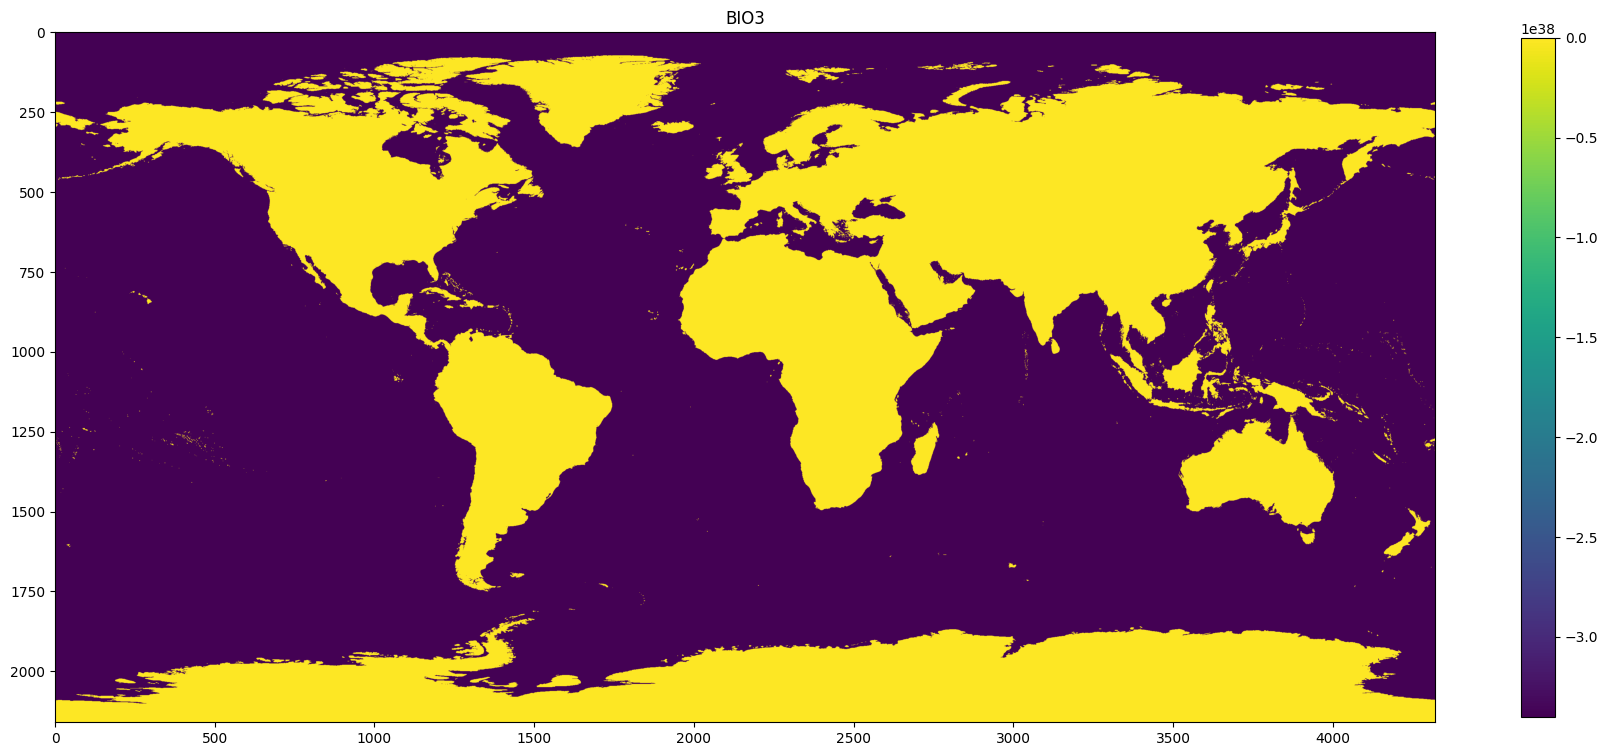

In [27]:
# Read in WorldClim data
# This time extract band1
# Note: Rasterio uses GDAL numbering so first band is 1
with rasterio.open(fp="/vsizip/vsicurl/https://geodata.ucdavis.edu/climate/worldclim/2_1/base/wc2.1_5m_bio.zip/wc2.1_5m_bio_3.tif", mode="r") as src:
    # Read in the first band
    bio3 = src.read(1)

# Plot the variable.
plt.figure(figsize=(18, 10))
plt.imshow(bio3, cmap="viridis")
plt.title("BIO3")
plt.colorbar(shrink=0.70)
plt.tight_layout()
plt.show()

In [63]:
# Open the raster (WorldClim data) with rasterio
with rasterio.open("/vsizip/vsicurl/https://geodata.ucdavis.edu/climate/worldclim/2_1/base/wc2.1_5m_bio.zip/wc2.1_5m_bio_3.tif") as src:
    # Look at the affine matrix
    print(src.meta["transform"])
    print("-" * 50)
    print(type(src.meta["transform"]))

| 0.08, 0.00,-180.00|
| 0.00,-0.08, 90.00|
| 0.00, 0.00, 1.00|
--------------------------------------------------
<class 'affine.Affine'>


In [64]:
# Open the raster (WorldClim data) with rasterio
with rasterio.open("/vsizip/vsicurl/https://geodata.ucdavis.edu/climate/worldclim/2_1/base/wc2.1_5m_bio.zip/wc2.1_5m_bio_3.tif") as src:
    # Extract the affine matrix (transform matrix)
    src_trans = src.meta["transform"]

A = np.array(object=src_trans).reshape(3, 3)

print("The affine matrix:")
print(A)
#
print("-" * 50)
#
print("Coordinates of the first pixel:")
print(A @ np.array([0, 0, 1]))
#
print("-" * 50)
#
print("Coordinates of the last pixel:")
print(A @ np.array([4320-1, 2160-1, 1]))

#print(np.array(object=src_trans).reshape(3, 3) @ np.array([1080-1, 2160-1, 1]))

#4320
#2160

The affine matrix:
[[   0.08333333    0.         -180.        ]
 [   0.           -0.08333333   90.        ]
 [   0.            0.            1.        ]]
--------------------------------------------------
Coordinates of the first pixel:
[-180.   90.    1.]
--------------------------------------------------
Coordinates of the last pixel:
[179.91666667 -89.91666667   1.        ]


In [65]:
# Numerical algebra quizzzzzzzz
print(np.linalg.det(A))

-0.006944444444444444


In [66]:
# Inverse affine:
# Using the affine object
print("Affine matrix of Affine class:")
print(~src_trans)
# Using the 
Am1 = np.linalg.inv(A)
print("\nAffine matrix of Array class:")
print(Am1)

Affine matrix of Affine class:
| 12.00, 0.00, 2160.00|
| 0.00,-12.00, 1080.00|
| 0.00, 0.00, 1.00|

Affine matrix of Array class:
[[  12.    0. 2160.]
 [  -0.  -12. 1080.]
 [   0.    0.    1.]]


In [67]:
# Load the first five observations of desert pea.
# We can be quick about it, no need for intermediate steps.
pea5 = pd.read_csv(filepath_or_buffer="../data/desert_pea.csv").loc[0:4 ,["decimalLongitude", "decimalLatitude"]]
pea5_1 = np.hstack((pea5, np.ones(5).reshape(5, 1)))
print("\nCoordinates of first five observations with a column of 1s:")
print(pea5_1.T)


Coordinates of first five observations with a column of 1s:
[[116.787842 122.580642 136.163344 136.874328 135.993515]
 [-20.585195 -22.843242 -32.524942 -30.397483 -32.268875]
 [  1.         1.         1.         1.         1.      ]]


In [68]:
# See the values of each cells
print("\nPixel coordinates of first five observations with a column of 1s:")
print(Am1 @ pea5_1.T)

print("\nPixel coordinates of first five observations with a column of 1s:")
print(np.round(Am1 @ pea5_1.T))


Pixel coordinates of first five observations with a column of 1s:
[[3561.454104 3630.967704 3793.960128 3802.491936 3791.92218 ]
 [1327.02234  1354.118904 1470.299304 1444.769796 1467.2265  ]
 [   1.          1.          1.          1.          1.      ]]

Pixel coordinates of first five observations with a column of 1s:
[[3561. 3631. 3794. 3802. 3792.]
 [1327. 1354. 1470. 1445. 1467.]
 [   1.    1.    1.    1.    1.]]


In [70]:
# Round the values so you get the closest pixel
coco = np.round(Am1 @ pea5_1.T)

# See the shape
print(coco.shape)

print("-" * 50)

# See the values
print(coco)

(3, 5)
--------------------------------------------------
[[3561. 3631. 3794. 3802. 3792.]
 [1327. 1354. 1470. 1445. 1467.]
 [   1.    1.    1.    1.    1.]]


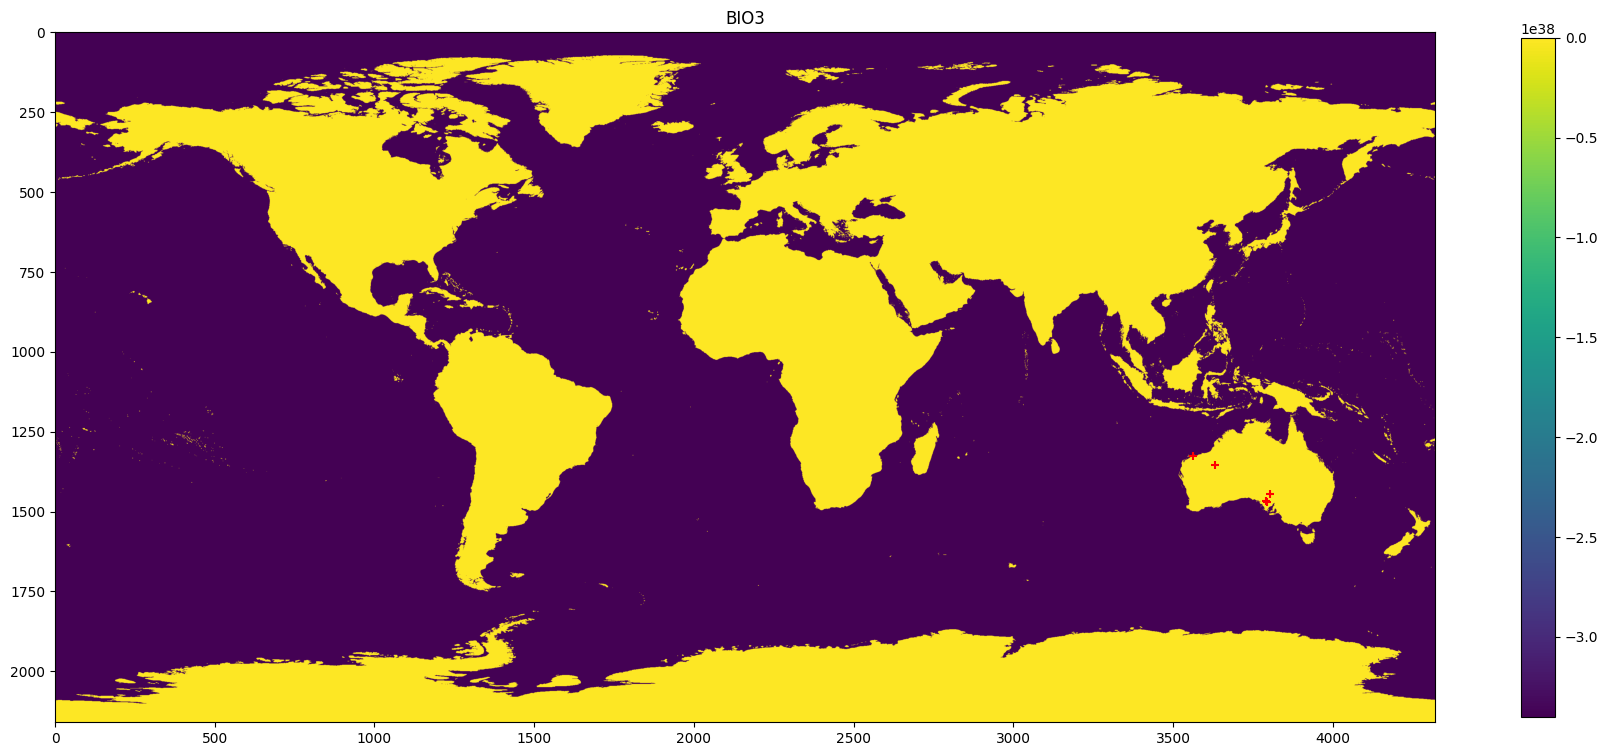

In [71]:
# But despite this, the plot still looks horrible, no?
# Plot the variable.
plt.figure(figsize=(18, 10))
plt.imshow(X=bio3, cmap="viridis")
plt.title(label="BIO3")
plt.colorbar(shrink=0.70)
plt.scatter(x=coco[0, :], y=coco[1, :], marker="+", color="red", s=35)
plt.tight_layout()
plt.show()

# Masks and whatnot

In [73]:
# Look at the data
print(bio3)
print("-" * 50)
print(type(bio3))

# 10^30 is a decillion.
# 10^36 is a duodecillion.
# 10^39 is a tredecillion.


[[-3.4000000e+38 -3.4000000e+38 -3.4000000e+38 ... -3.4000000e+38
  -3.4000000e+38 -3.4000000e+38]
 [-3.4000000e+38 -3.4000000e+38 -3.4000000e+38 ... -3.4000000e+38
  -3.4000000e+38 -3.4000000e+38]
 [-3.4000000e+38 -3.4000000e+38 -3.4000000e+38 ... -3.4000000e+38
  -3.4000000e+38 -3.4000000e+38]
 ...
 [ 2.2238514e+01  2.2767344e+01  2.2771856e+01 ...  2.2453773e+01
   2.2464491e+01  2.1306957e+01]
 [ 2.1869759e+01  2.2406609e+01  2.2410324e+01 ...  2.2070810e+01
   2.2097294e+01  2.0919388e+01]
 [ 2.2657402e+01  2.3176918e+01  2.3175797e+01 ...  2.2827381e+01
   2.2828657e+01  2.1676645e+01]]
--------------------------------------------------
<class 'numpy.ndarray'>


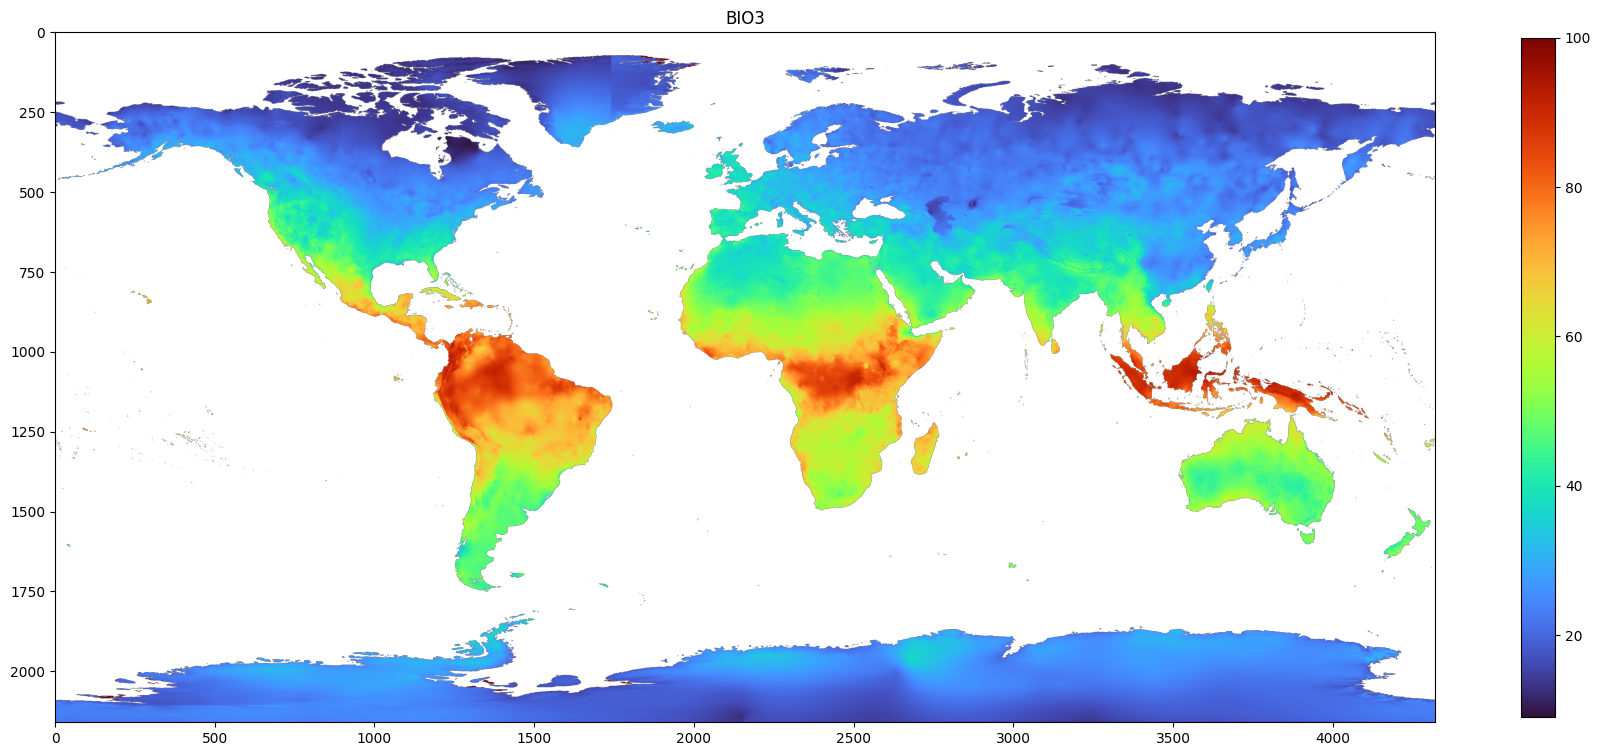

In [79]:
# Read in WorldClim data
# This time extract band1
# Note: Rasterio uses GDAL numbering so first band is 1
with rasterio.open(fp="/vsizip/vsicurl/https://geodata.ucdavis.edu/climate/worldclim/2_1/base/wc2.1_5m_bio.zip/wc2.1_5m_bio_3.tif", mode="r") as src:
    # Read in the first band with the masked=True argument
    bio3 = src.read(1, masked=True)

# Plot the variable with the masked values not considered.
plt.figure(figsize=(18, 10))
plt.imshow(bio3, cmap="turbo")
plt.title(label="BIO3")
plt.colorbar(shrink=0.70)
plt.tight_layout()
plt.show()

In [80]:
# Look at the newly changed data
print(bio3)
print("-" * 50)
print(type(bio3))

[[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [22.238513946533203 22.767343521118164 22.7718563079834 ...
  22.453773498535156 22.46449089050293 21.306957244873047]
 [21.86975860595703 22.40660858154297 22.410324096679688 ...
  22.070810317993164 22.097293853759766 20.919387817382812]
 [22.65740203857422 23.176918029785156 23.175796508789062 ...
  22.827381134033203 22.828657150268555 21.676645278930664]]
--------------------------------------------------
<class 'numpy.ma.MaskedArray'>


# Rasters a numpy arrays

In [48]:
# Look at the data
print(type(bio3))

<class 'numpy.ma.MaskedArray'>


In [81]:
# You can therfore analyze it just like any regular numpy array.
print(f"Minimum value: {bio3.min():.2f}")
print(f"Maximum value: {bio3.max():.2f}")
print(f"Average value: {bio3.mean():.2f}")
print(f"Standard deviation: {bio3.std():.2f}")

Minimum value: 9.06
Maximum value: 100.00
Average value: 34.42
Standard deviation: 18.84


In [53]:
# Using the same method, fetch data for BIO6
with rasterio.open(fp="/vsizip/vsicurl/https://geodata.ucdavis.edu/climate/worldclim/2_1/base/wc2.1_5m_bio.zip/wc2.1_5m_bio_6.tif", mode="r") as src:
    bio6 = src.read(1, masked=True)

# Using the same method, fetch data for BIO5
with rasterio.open(fp="/vsizip/vsicurl/https://geodata.ucdavis.edu/climate/worldclim/2_1/base/wc2.1_5m_bio.zip/wc2.1_5m_bio_5.tif", mode="r") as src:
    bio5 = src.read(1, masked=True)

# Using the same method, fetch data for BIO7
with rasterio.open(fp="/vsizip/vsicurl/https://geodata.ucdavis.edu/climate/worldclim/2_1/base/wc2.1_5m_bio.zip/wc2.1_5m_bio_2.tif", mode="r") as src:
    bio2 = src.read(1, masked=True)

# Print basic info
#print(f"Minimum value: {bio7.min():.2f}")
#print(f"Maximum value: {bio7.max():.2f}")
#print(f"Average value: {bio7.mean():.2f}")
#print(f"Standard deviation: {bio7.std():.2f}")

In [54]:
# Compute BIO3 "by hand" (if your hand was a computer)
#
#bio3 = bio2 / bio7 * 100

bio3 = bio2 / (bio5 - bio6) * 100


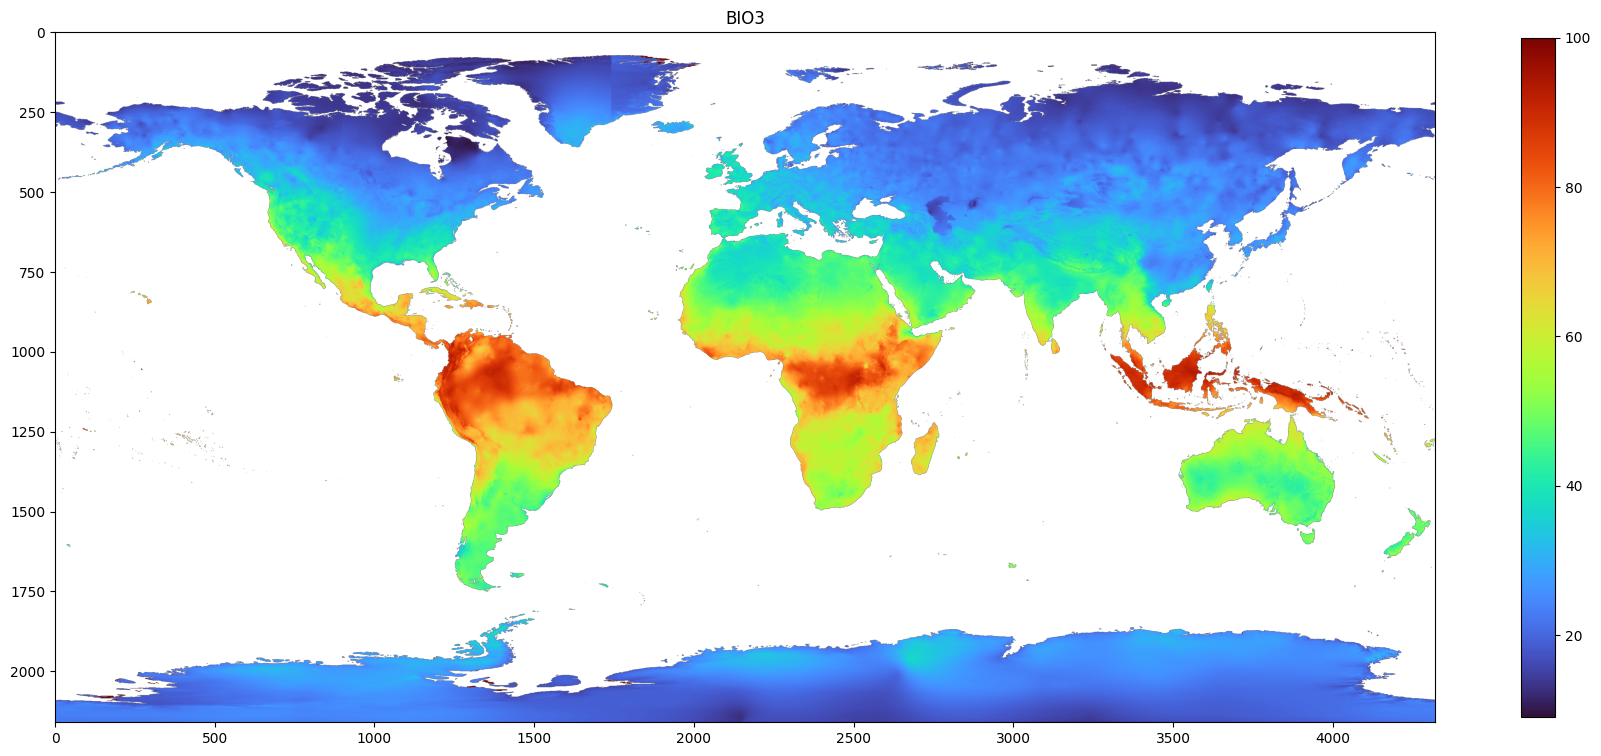

In [63]:
# Have a look at your creation.
plt.figure(figsize=(18, 10))
plt.imshow(bio3, cmap="turbo")
plt.title("BIO3")
plt.colorbar(shrink=0.70)
plt.tight_layout()
plt.show()

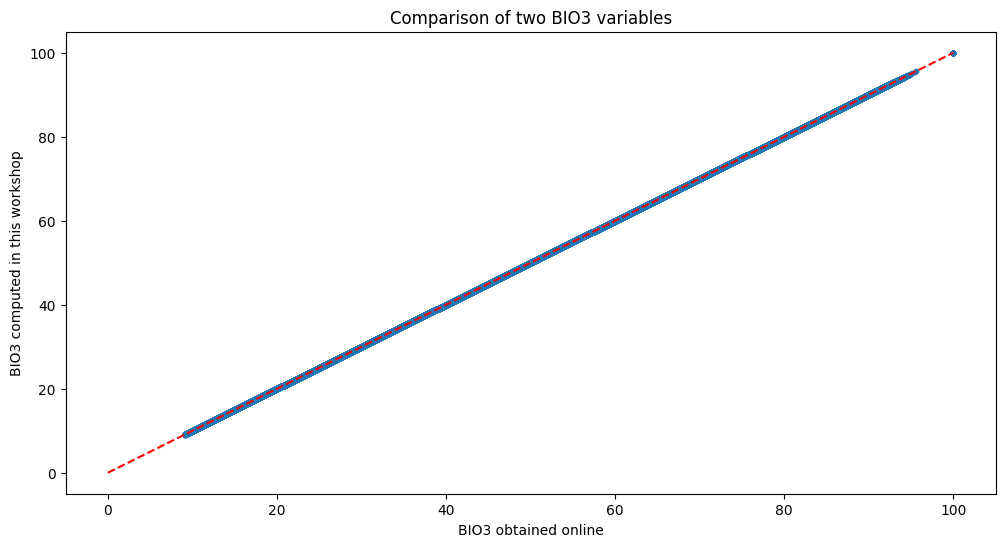

In [66]:
# Just for kicks, read the actual BIO3
with rasterio.open(fp="/vsizip/vsicurl/https://geodata.ucdavis.edu/climate/worldclim/2_1/base/wc2.1_5m_bio.zip/wc2.1_5m_bio_3.tif", mode="r") as src:
    bio3real = src.read(1, masked=True)

# Create a scatter plot comparing the two
plt.figure(figsize=(12, 6))
plt.scatter(bio3real.flatten(), bio3.flatten(), s=10)
# Add the 1:1 line (y = x)
plt.plot([0, 100], [0, 100], color="red", linestyle="dashed", label="1:1 line")

# Labeling the axes and title
plt.xlabel("BIO3 obtained online")
plt.ylabel("BIO3 computed in this workshop")
plt.title("Comparison of two BIO3 variables")

# Show the plot
plt.show()

# CROPPING

In [3]:
# Go fetch the Australian territories data once more.
# Convert it to EPSG4326, the same CRS as the WORLDCLIM data.
gdf_aus = gpd.read_file("https://www.abs.gov.au/statistics/standards/australian-statistical-geography-standard-asgs-edition-3/jul2021-jun2026/access-and-downloads/digital-boundary-files/STE_2021_AUST_SHP_GDA2020.zip")
gdf_aus.to_crs(crs=4326, inplace=True)

In [ ]:
# Open the raster (WorldClim data) with rasterio
with rasterio.open("/vsizip/vsicurl/https://geodata.ucdavis.edu/climate/worldclim/2_1/base/wc2.1_5m_bio.zip/wc2.1_5m_bio_11.tif") as src:
    # Read the first band
    band1 = src.read(1, masked=True)
 
    # DISREGARD THE LAST "GEOMETRY"
    # WHY YOU EXIST FOR ONLY A LINK?!?!?!
#    out_image, out_transform = mask(src, gdf_aus.geometry[0:9], crop=True, filled=True)

# IF JUST ONE IT NEEDS TO BE A LIST
    out_image, out_transform = mask(src, [gdf_aus.geometry[2]], crop=True, filled=True)
#    out_image, out_transform = mask(src, gdf_aus.geometry[0:9], crop=False, filled=True)

#    out_image, out_transform = rasterio.mask.mask(src, [gdf_aus.geometry[2]], crop=True, filled=True)
#    out_image, out_transform = rasterio.mask.mask(src, [gdf_aus.geometry[2]], crop=True, filled=True)
    
    # Get the nodata value
#    nodata_val = src.nodata

    # Step 4: Update metadata to reflect the new cropped raster
    out_meta = src.meta.copy()
    out_meta.update({
        "driver": "GTiff",
        "count": 1,
        "dtype": 'float32',
        "crs": src.crs,
 #       "nodata": nodata_val,
        "transform": out_transform,
        "width": out_image.shape[2],
        "height": out_image.shape[1]
    })


In [19]:
# Save the cropped raster to a new file
with rasterio.open(fp="../data/austo.tif", mode="w", **out_meta) as dest:
    dest.write(out_image)

c:\Users\elami\OneDrive\Desktop\pywork\.venv\Lib\site-packages\matplotlib\colors.py:778: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


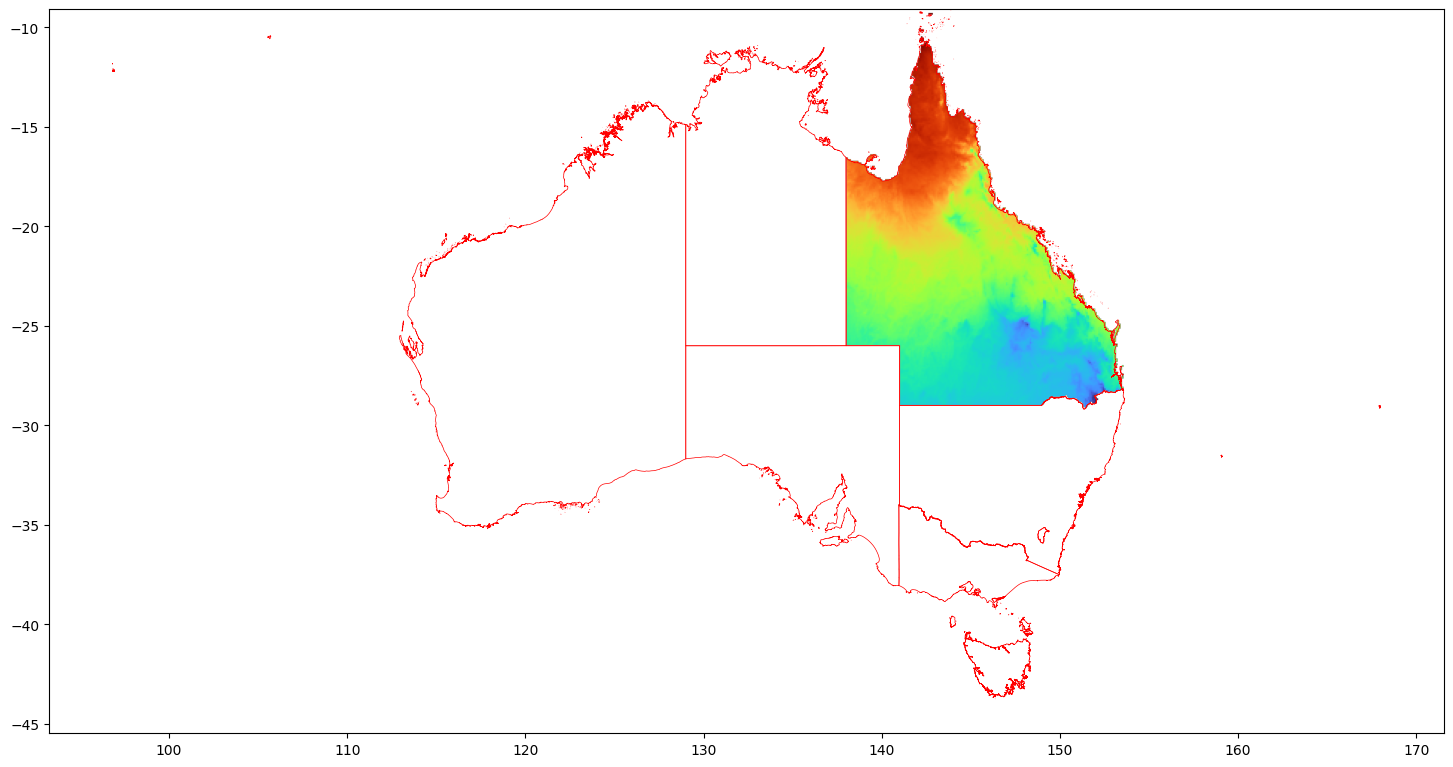

In [20]:
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show

# Open the raster file
with rasterio.open("../data/austo.tif") as src:
    fig, ax = plt.subplots(figsize=(18, 10))
    
    # Use rasterio's show() function to display the image
    rasterio.plot.show(source=src, ax=ax, cmap="turbo")

# Add additional layers like boundaries, if necessary
gdf_aus.boundary.plot(ax=ax, color="red", linewidth=0.5)

# Display the plot
plt.show()

c:\Users\elami\OneDrive\Desktop\pywork\.venv\Lib\site-packages\matplotlib\colors.py:778: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


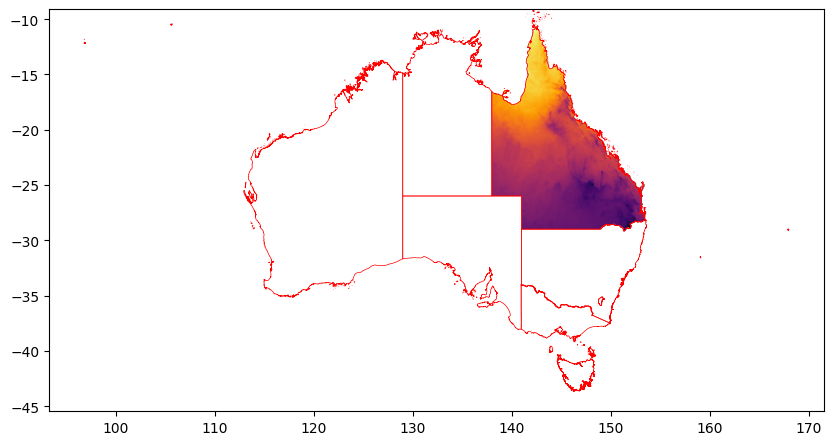

In [86]:
fig, ax = plt.subplots(figsize=(10, 10))
with rasterio.open("../data/austo.tif") as src:
    rasterio.plot.show(src, ax=ax, cmap="inferno")
gdf_aus.boundary.plot(ax=ax, color="red", linewidth=0.5)
plt.show()

In [94]:
countries = gpd.read_file(filename="https://raw.githubusercontent.com/python-visualization/folium-example-data/main/world_countries.json")
sel_country = countries[countries["name"] == "Argentina"].geometry.iloc[0]
type(sel_country)

shapely.geometry.multipolygon.MultiPolygon

In [95]:
# Open the raster (WorldClim data) with rasterio
with rasterio.open("/vsizip/vsicurl/https://geodata.ucdavis.edu/climate/worldclim/2_1/base/wc2.1_5m_bio.zip/wc2.1_5m_bio_11.tif") as src:
    # Read the first band
    band1 = src.read(1, masked=True)
 
    # DISREGARD THE LAST "GEOMETRY"
    # WHY YOU EXIST FOR ONLY A LINK?!?!?!
#    out_image, out_transform = mask(src, gdf_aus.geometry[0:9], crop=True, filled=True)

# IF JUST ONE IT NEEDS TO BE A LIST
    out_image, out_transform = mask(src, [sel_country], crop=True, filled=True)
#    out_image, out_transform = mask(src, gdf_aus.geometry[0:9], crop=False, filled=True)
    
    # Get the nodata value
    nodata_val = src.nodata

    # Step 4: Update metadata to reflect the new cropped raster
    out_meta = src.meta.copy()
    out_meta.update({
        "driver": "GTiff",
        "count": 1,  # Since we're working with a single band
        "dtype": 'float32',  # You can adjust the dtype if necessary
        "crs": src.crs,  # Preserve the CRS
        "nodata": nodata_val,
        "transform": out_transform,
        "width": out_image.shape[2],  # Number of columns in the cropped image
        "height": out_image.shape[1]  # Number of rows in the cropped image
    })

In [96]:
# Optionally, save the cropped image as a new file
with rasterio.open("cropped_raster.tif", "w", **out_meta) as dest:
    dest.write(out_image)

c:\Users\elami\OneDrive\Desktop\pywork\.venv\Lib\site-packages\matplotlib\colors.py:778: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


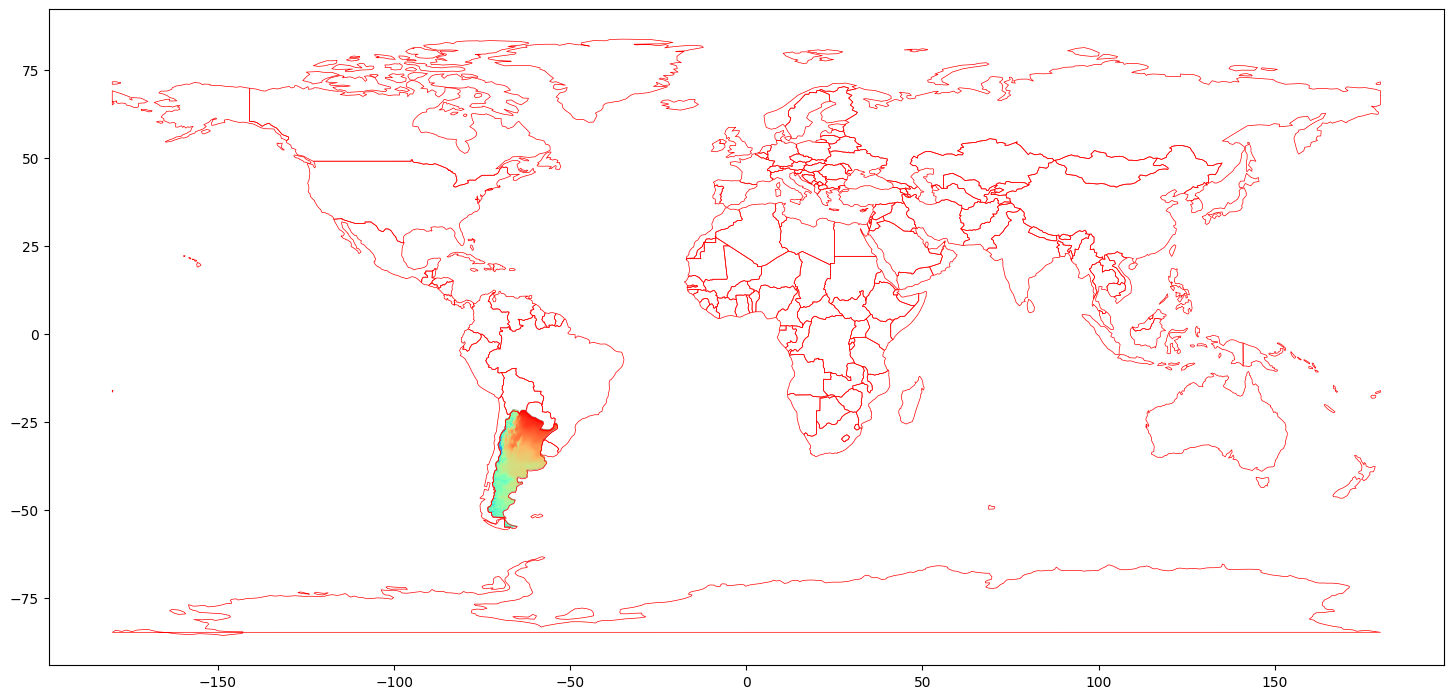

In [97]:
# Let's try to overlay them...
with rasterio.open(fp="cropped_raster.tif", mode="w", **out_meta) as dest:
    dest.write(out_image)

fig, ax = plt.subplots(figsize=(18, 10))
with rasterio.open("cropped_raster.tif") as src:
    rasterio.plot.show(src, ax=ax, cmap="rainbow")
countries.boundary.plot(ax=ax, color="red", linewidth=0.5)
plt.show()

In [344]:
print(out_transform * (0, 0))  # Bottom-left corner
print(out_transform * (out_image.shape[2], out_image.shape[1]))  # Top-right corner

(96.75, -9.083333333333329)
(168.0, -43.74999999999999)
